In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print("x_train.shape:", x_train.shape, "y_train.shape:", y_train.shape)

x_train.shape: (60000, 28, 28) y_train.shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


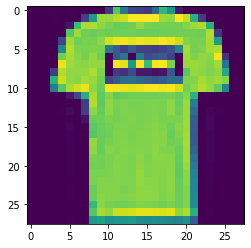

In [4]:
#printing training set shape 

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

#print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

class_names = ['T-shirt/top', #index 0
               'Trouser',     #index 1
               'Pullover',    #index 2
               'Dress',       #index 3
               'Coat',        #index 4
               'Sandal',      #index 5
               'Shirt',       #index 6
               'Sneaker',     #index 7
               'Bag',         #index 8
               'Ankle boot']  #index 9



plt.imshow(x_train[1])

In [5]:
#normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))


Number of train data - 60000
Number of test data - 10000


In [7]:
#Breaking the training data into training and validation sets 
(x_train, x_valid) = x_train[6000:], x_train[:6000]
(y_train, y_valid) = y_train[6000:], y_train[:6000]

# Reshape input data from (28, 28) to (28, 28, 1)
l, w = 28, 28

x_train = x_train.reshape(x_train.shape[0], l, w, 1)
x_test = x_test.reshape(x_test.shape[0], l, w, 1)
x_valid = x_valid.reshape(x_valid.shape[0], l, w, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#printing the training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

#printing the number of training, validation, and test datasets

print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')
print(x_valid.shape[0], 'validation set')

x_train shape: (54000, 28, 28, 1) y_train shape: (54000, 10)
54000 train set
10000 test set
6000 validation set


In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', strides=1, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 1024)              11076608  
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                        

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [12]:
x = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2, validation_data=(x_valid, y_valid), callbacks=[checkpointer])



Epoch 1/10

Epoch 1: val_loss improved from inf to 0.27517, saving model to model.weights.best.hdf5
844/844 - 10s - loss: 0.3778 - accuracy: 0.8642 - val_loss: 0.2752 - val_accuracy: 0.8987 - 10s/epoch - 12ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.27517 to 0.24841, saving model to model.weights.best.hdf5
844/844 - 5s - loss: 0.2541 - accuracy: 0.9061 - val_loss: 0.2484 - val_accuracy: 0.9092 - 5s/epoch - 6ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.24841 to 0.22802, saving model to model.weights.best.hdf5
844/844 - 5s - loss: 0.2068 - accuracy: 0.9229 - val_loss: 0.2280 - val_accuracy: 0.9190 - 5s/epoch - 6ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.22802
844/844 - 5s - loss: 0.1721 - accuracy: 0.9359 - val_loss: 0.2408 - val_accuracy: 0.9125 - 5s/epoch - 6ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.22802
844/844 - 5s - loss: 0.1447 - accuracy: 0.9450 - val_loss: 0.2467 - val_accuracy: 0.9178 - 5s/epoch - 6ms/step
Epoch 6/10

Epoc

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print('\nTest accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3099 - accuracy: 0.9236

Test accuracy: 0.9236000180244446


In [15]:
#to get out all the trainable variabels out of layers
model.trainable_variables

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
 array([[[[ 1.37177661e-01, -1.76095739e-01, -1.89053789e-01,
           -1.09201536e-01, -1.49767790e-02,  1.98887497e-01,
           -3.23588550e-01,  3.39013964e-01,  1.10589743e-01,
           -8.07404742e-02, -1.84857383e-01, -9.19865072e-03,
           -4.17972617e-02,  8.70808363e-02, -1.96237698e-01,
           -3.91074002e-01, -2.39128694e-01, -1.92579776e-01,
            3.24495248e-02, -1.15140431e-01,  5.45334117e-03,
            1.90592617e-01, -2.85880193e-02,  1.73130035e-01,
           -1.97144374e-01,  2.76680291e-01,  2.80844182e-01,
            7.89806098e-02,  9.80676487e-02,  7.63222575e-02,
           -2.74125755e-01, -2.35684235e-02, -2.15968732e-02,
           -1.14841433e-02,  1.92308918e-01, -2.92542800e-02,
           -3.23246978e-02, -1.42128706e-01,  4.38185222e-03,
           -2.04248816e-01, -3.13710690e-01, -1.54231459e-01,
            1.52136728e-01, -1.19049795e-01, -3.14662814e-

In [16]:
model.trainable_variables[2]

<tf.Variable 'dense/kernel:0' shape=(10816, 1024) dtype=float32, numpy=
array([[-4.7014863e-03, -4.1624740e-02,  1.0221154e-01, ...,
        -6.9188103e-02, -2.7957743e-02,  8.6273983e-02],
       [-1.6281798e-02, -6.0536914e-02, -1.5431264e-03, ...,
        -9.0443268e-02,  8.8195602e-04,  6.9545120e-02],
       [-5.4648020e-03, -4.1204928e-03,  3.1316292e-02, ...,
         2.0754658e-02,  2.1894321e-02,  1.0623015e-03],
       ...,
       [ 1.2624807e-02, -2.4904007e-02, -2.1396497e-02, ...,
        -2.5131190e-02,  2.9249676e-02,  3.6485676e-02],
       [ 1.5093381e-02, -2.0063408e-01, -4.8754010e-02, ...,
        -8.1417494e-02, -7.2164178e-02, -7.4128613e-02],
       [-2.3839613e-02, -9.0890992e-03,  2.1567423e-04, ...,
        -3.6064502e-02,  6.5166473e-02, -4.4537815e-01]], dtype=float32)>

In [17]:
def convertWeights (model):
    
    convKernels = model.trainable_variables[0].numpy()
    convBiases = model.trainable_variables[1].numpy()
    
    W1 = np.zeros((26*26*64, 28*28)) #for convolution Filter Weights
    B1 = np.zeros((26*26*64,)) # for convolution of Filter Biases
    W2 = model.trainable_variables[2].numpy().T
    B2 = model.trainable_variables[3].numpy()
    W3 = model.trainable_variables[4].numpy().T
    B3 = model.trainable_variables[5].numpy()
    index = 0
    
    for i in range(26):
        for j in range(26):
            for f in range(64):
                for row in range(3):
                    start = (i + row)*28 + j
                    end = start + 3
                    W1[index, start:end] = convKernels[row,:,0,f]
                B1[index] = convBiases[f]
                index += 1
    return W1, B1, W2, B2, W3, B3
                    

In [18]:
def fullyConnectedNN (W, b, x):
    h = x
    for i in range(len(W)):
        z = np.dot(W[i], h) + b[i]
        
        if i == 0:
            h = relu(maxPooling(z))
        elif i == len(W)-1:
            h = z
        else:
            h = relu(z)
    return h

In [19]:
def maxPooling (x):
    x = x.reshape((26, 26, 64))
    h = np.zeros((13, 13, 64))
    for i in range(0, 25, 2):
        for j in range(0, 25, 2):
            for f in range(64):
                h[i//2, j//2, f] = np.max(x[i:i+2, j:j+2, f])
    return h.flatten()
                
            
    

In [20]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=0)

In [21]:
def relu(z):
    return (z>0) * z

In [22]:
W1, B1, W2, B2, W3, B3 = convertWeights(model)

W = [W1, W2, W3]
b = [B1, B2, B3]

In [23]:
x = x_train[0, :, :, 0].flatten()
z = fullyConnectedNN(W, b, x)

yhat = softmax(z)
print(f'FNN Predicted Values: {yhat}')
print(model.predict(x_train[0:1,:,:,0])[0])
if (np.argmax(yhat) == np.argmax(model.predict(x_train[0:1,:,:,:])[0])):
    print('Same Prediction.')
else:
    print('Different Prediction.')

FNN Predicted Values: [3.75481364e-08 1.24463494e-09 6.20628349e-06 6.30316978e-16
 2.37396063e-09 2.56242824e-11 1.89935365e-11 2.96941382e-16
 9.99993753e-01 3.66439053e-17]
1/1 [==============================] - 0s 218ms/step
[3.7648409e-08 1.2497587e-09 6.2171271e-06 6.2898946e-16 2.3794549e-09
 2.5647370e-11 1.9045517e-11 2.9748443e-16 9.9999368e-01 3.6713531e-17]
1/1 [==============================] - 0s 45ms/step
Same Prediction.
